# Дисперсионный анализ

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

# настраиваем изображение графиков
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../tr/tr.xls', skiprows=7)

In [3]:
df.head(10)

,Region,Days,Visits,ExtrCharges,Tips,USD
0,1,11.0,4,202.0,204.0,23624.0
1,1,18.0,2,160.0,139.0,11144.0
2,1,20.0,2,137.0,117.0,10614.0
3,1,14.0,4,270.0,208.0,24190.0
4,1,15.0,4,212.0,173.0,16490.0
5,1,22.0,2,161.0,178.0,NaN
6,1,17.0,2,190.0,153.0,13354.0
7,1,15.0,4,212.0,173.0,16094.0
8,1,NaN,4,NaN,183.0,NaN
9,1,12.0,6,312.0,198.0,31945.0


In [4]:
df.groupby(by='Region')['Tips'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
1,43.0,178.465116,41.340830,106.0,141.0,183.0,201.0,288.0
2,14.0,179.142857,37.317468,124.0,154.0,168.0,208.5,251.0
3,32.0,153.468750,35.693122,98.0,133.0,146.0,166.5,243.0


In [5]:
col = df.columns

In [6]:
# оставим только 2 столбца
col = col.drop(labels=['Region', 'Tips'])

In [7]:
df = df.drop(labels=col, axis=1)

In [8]:
df.dropna(inplace=True)

In [31]:
reg1 = df[df.Region == 1].Tips
reg2 = df[df.Region == 2].Tips
reg3 = df[df.Region == 3].Tips

In [10]:
# определим удобную для визуализации функцию
def get_visual(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    sns.distplot(data, ax=ax1)
    stats.probplot(data, plot=ax2)
    plt.show()
    print('Shapiro-Wilk test: p-value={}'.format(stats.shapiro(data)[1]))

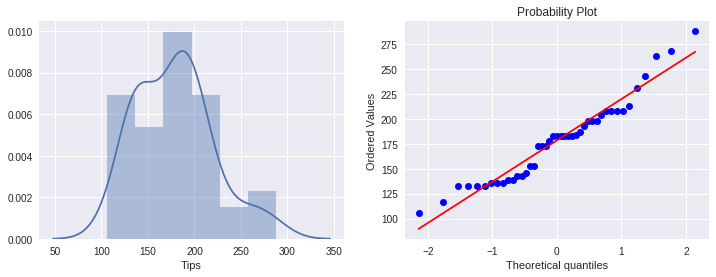

Shapiro-Wilk test: p-value=0.04872238636016846


In [13]:
get_visual(reg1)

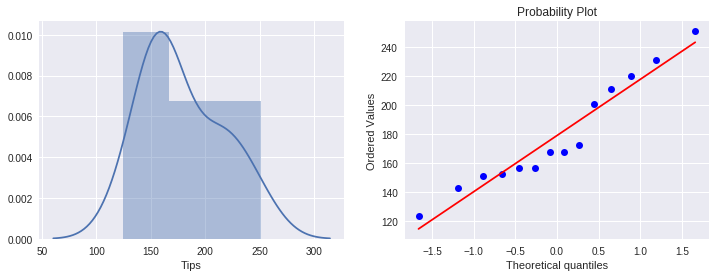

Shapiro-Wilk test: p-value=0.330227792263031


In [14]:
get_visual(reg2)

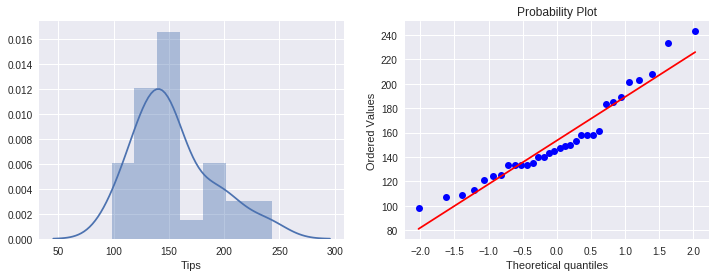

Shapiro-Wilk test: p-value=0.042984738945961


In [32]:
get_visual(reg3)

Логарифмируем наши выборки

In [33]:
reg1_log = np.log(reg1)
reg2_log = np.log(reg2)
reg3_log = np.log(reg3)

Снова проверим нормальность и гомогенность дисперсий

In [35]:
print('Shapiro-Wilk test: p-value={}'.format(stats.shapiro(reg1_log)[1]))
print('Shapiro-Wilk test: p-value={}'.format(stats.shapiro(reg2_log)[1]))
print('Shapiro-Wilk test: p-value={}'.format(stats.shapiro(reg3_log)[1]))

Shapiro-Wilk test: p-value=0.2536405026912689
Shapiro-Wilk test: p-value=0.6228918433189392
Shapiro-Wilk test: p-value=0.5510596632957458


In [36]:
stats.fligner(reg1, reg2, reg3)

FlignerResult(statistic=0.67040526240385412, pvalue=0.71519315122102389)

Посчитаем F значение

In [39]:
stats.f_oneway(reg1_log, reg2_log, reg3_log)

F_onewayResult(statistic=4.7932983472171236, pvalue=0.010625819715604121)

Как видим, p значение мало (< 0.05), что говорит о неравентсве средних как миниму в 2 выборках

_ради интереса_

In [44]:
stats.ttest_ind(reg1_log, reg2_log)

Ttest_indResult(statistic=-0.14396617266093883, pvalue=0.88605339510011061)

In [45]:
stats.ttest_ind(reg1_log, reg3_log)

Ttest_indResult(statistic=2.8384222378569102, pvalue=0.0058674377367042493)

In [46]:
stats.ttest_ind(reg2_log, reg3_log)

Ttest_indResult(statistic=2.2950494730278956, pvalue=0.026556724803421722)